# Life Cycle Assessment of an inductor
*Written by Félix Pollet, ISAE-Supaéro, France*

The objective of this notebook is to conduct a life cycle assessment on the inductor to evaluate its environmental impact over several categories.

In a second step, you will re-run the optimization process from notebook [06_SizingCodeInductor](06_SizingCodeInductor.ipynb) with an environmental objective function instead of a mass minimization objective.

In [1]:
# Import libraries
import pandas as pd
from IPython import display as ICD
import importlib
SizingCodeInductor = __import__("06_SizingCodeInductor_")
SizingCode = SizingCodeInductor.SizingCode
import scipy
import scipy.optimize

# Data for the LCA

Collecting data for a Life Cycle Inventory can be a time-consuming process. In this study, we will rely on a pre-existing database that directly provides the impacts associated with the production of the coil, the ferromagnetic core and the plastic body. This includes the entire production chain, from raw material extraction to the final product, including transportation from one site to another. In addition, the database provides the environmental impact of producing 1 kWh of electricity using the French electricity mix. This is useful to take into account the impact of transmission losses (Joule heating).

The following lines import the databases and display the data over 16 impact categories, including climate change, particulate matter formation, and material resources depletion.

Beware, the impacts are provided for 1 kg of final product, or, for the electricity, 1 kWh of electricity production.

**Exercise:** Have a first look at the impacts generated by the production of each component. Be curious about what represent each impact.

*Impact categories*

![LCAcategeories](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/impact_categories_1.JPG)
![LCAcategeories2](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project//assets/images/impact_categories_2.JPG)


In [2]:
# Path to the database
database_path = 'assets/data/acv_inductance.xlsx'

# Read LCA data for each component
df_copper = pd.read_excel(database_path, sheet_name='Copper wire (1 kg)')
df_core = pd.read_excel(database_path, sheet_name='Ferrite (1 kg)')
df_body = pd.read_excel(database_path, sheet_name='Plastic body (1 kg)')
df_electricity = pd.read_excel(database_path, sheet_name='Electricity France (1 kWh)')

# Display LCA data for each component
print("LCA for the production of 1 kg of copper"); ICD.display(df_copper)
print("LCA for the production of 1 kg of ferrite"); ICD.display(df_core)
print("LCA for the production of 1 kg of polyester resin"); ICD.display(df_body)
print("LCA for the production of 1 kWh of electricity (France)"); ICD.display(df_electricity)

LCA for the production of 1 kg of copper


,Impact category,Indicator,Impact Score,Unit
0,acidification,accumulated exceedance (AE),5.816810e-01,mol H+-Eq
1,climate change,global warming potential (GWP100),7.433720e+00,kg CO2-Eq
2,ecotoxicity: freshwater,comparative toxic unit for ecosystems (CTUe),6.632250e+02,CTUe
3,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,9.333420e+01,"MJ, net calorific value"
4,eutrophication: freshwater,fraction of nutrients reaching freshwater end ...,4.579140e-02,kg P-Eq
5,eutrophication: marine,fraction of nutrients reaching marine end comp...,2.856350e-02,kg N-Eq
6,eutrophication: terrestrial,accumulated exceedance (AE),3.980400e-01,mol N-Eq
7,human toxicity: carcinogenic,comparative toxic unit for human (CTUh),8.789730e-08,CTUh
8,human toxicity: non-carcinogenic,comparative toxic unit for human (CTUh),7.687160e-06,CTUh
9,ionising radiation: human health,human exposure efficiency relative to u235,8.552100e-01,kBq U235-Eq


LCA for the production of 1 kg of ferrite


,Impact category,Indicator,Impact Score,Unit
0,acidification,accumulated exceedance (AE),1.467400e-02,mol H+-Eq
1,climate change,global warming potential (GWP100),2.073400e+00,kg CO2-Eq
2,ecotoxicity: freshwater,comparative toxic unit for ecosystems (CTUe),2.390300e+01,CTUe
3,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,2.272700e+01,"MJ, net calorific value"
4,eutrophication: freshwater,fraction of nutrients reaching freshwater end ...,8.475800e-04,kg P-Eq
5,eutrophication: marine,fraction of nutrients reaching marine end comp...,3.329300e-03,kg N-Eq
6,eutrophication: terrestrial,accumulated exceedance (AE),3.572600e-02,mol N-Eq
7,human toxicity: carcinogenic,comparative toxic unit for human (CTUh),9.170400e-08,CTUh
8,human toxicity: non-carcinogenic,comparative toxic unit for human (CTUh),2.892800e-08,CTUh
9,ionising radiation: human health,human exposure efficiency relative to u235,1.620100e-01,kBq U235-Eq


LCA for the production of 1 kg of polyester resin


,Impact category,Indicator,Impact Score,Unit
0,acidification,accumulated exceedance (AE),2.240100e-02,mol H+-Eq
1,climate change,global warming potential (GWP100),4.983600e+00,kg CO2-Eq
2,ecotoxicity: freshwater,comparative toxic unit for ecosystems (CTUe),1.121200e+02,CTUe
3,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,9.890800e+01,"MJ, net calorific value"
4,eutrophication: freshwater,fraction of nutrients reaching freshwater end ...,1.119300e-03,kg P-Eq
5,eutrophication: marine,fraction of nutrients reaching marine end comp...,3.902000e-03,kg N-Eq
6,eutrophication: terrestrial,accumulated exceedance (AE),4.077700e-02,mol N-Eq
7,human toxicity: carcinogenic,comparative toxic unit for human (CTUh),3.105100e-09,CTUh
8,human toxicity: non-carcinogenic,comparative toxic unit for human (CTUh),5.241500e-08,CTUh
9,ionising radiation: human health,human exposure efficiency relative to u235,3.098000e-01,kBq U235-Eq


LCA for the production of 1 kWh of electricity (France)


,Impact category,Indicator,Impact Score,Unit
0,acidification,accumulated exceedance (AE),3.318000e-04,mol H+-Eq
1,climate change,global warming potential (GWP100),7.769200e-02,kg CO2-Eq
2,ecotoxicity: freshwater,comparative toxic unit for ecosystems (CTUe),3.723700e-01,CTUe
3,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,1.161900e+01,"MJ, net calorific value"
4,eutrophication: freshwater,fraction of nutrients reaching freshwater end ...,1.533300e-05,kg P-Eq
5,eutrophication: marine,fraction of nutrients reaching marine end comp...,9.840600e-05,kg N-Eq
6,eutrophication: terrestrial,accumulated exceedance (AE),7.263700e-04,mol N-Eq
7,human toxicity: carcinogenic,comparative toxic unit for human (CTUh),4.926400e-11,CTUh
8,human toxicity: non-carcinogenic,comparative toxic unit for human (CTUh),1.099000e-09,CTUh
9,ionising radiation: human health,human exposure efficiency relative to u235,5.266300e-01,kBq U235-Eq


# LCA of the sized inductor

Now that we know how much impacts correspond to the production of 1 kg of coil, 1 kg of ferromagnetic core, 1 kg of plastic and 1 kWh of electricity, the next step is to calculate the total impact of the inductor. For this purpose, we have to aggregate the impact scores of each component. 

In [4]:
# Set the values of the parameters obtained with the sizing code
M_copper = 1.41  # [kg]
M_core = 6.44  # [kg]
M_plastic = 0.0  # [kg]
E_losses = 0.0  # [kWh]

# Create a dictionary to store the LCA database of each component and the corresponding sizing parameters
dataframes_and_params = {
    'Copper wire (1 kg)': {'df': df_copper, 'param': M_copper},
    'Ferrite (1 kg)': {'df': df_core, 'param': M_core},
    'Plastic body (1 kg)': {'df': df_body, 'param': M_plastic},
    'Electricity France (1 kWh)': {'df': df_electricity, 'param': E_losses}
}

# Create an empty DataFrame to store the final results
result_df = pd.DataFrame(columns=["Impact category", "Indicator", "Unit"])

# Populate the result DataFrame with the impacts of each component
for component, data in dataframes_and_params.items():
    df = data['df'].copy()
    param = data['param']
    
    # Multiply the "Impact Score" by the parameter
    df['Impact Score'] *= param
    
    # Rename the "Impact Score" column to include the name of the corresponding component
    df.rename(columns={'Impact Score': f'Impact Score ({component.split()[0]})'}, inplace=True)
    
    # Merge the DataFrames based on the common columns
    result_df = pd.merge(result_df, df, how='outer', on=["Impact category", "Indicator", "Unit"])

# Calculate the total impact score by aggregating the impacts of each component
result_df['Impact Score (Total)'] = result_df.filter(like='Impact Score').sum(axis=1)

# Display the results
result_df

,Impact category,Indicator,Impact Score (Copper),Unit,Impact Score (Ferrite),Impact Score (Plastic),Impact Score (Electricity),Impact Score (Total)
0,acidification,accumulated exceedance (AE),8.201702e-01,mol H+-Eq,9.450056e-02,0.0,0.0,9.146708e-01
1,climate change,global warming potential (GWP100),1.048155e+01,kg CO2-Eq,1.335270e+01,0.0,0.0,2.383424e+01
2,ecotoxicity: freshwater,comparative toxic unit for ecosystems (CTUe),9.351472e+02,CTUe,1.539353e+02,0.0,0.0,1.089083e+03
3,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,1.316012e+02,"MJ, net calorific value",1.463619e+02,0.0,0.0,2.779631e+02
4,eutrophication: freshwater,fraction of nutrients reaching freshwater end ...,6.456587e-02,kg P-Eq,5.458415e-03,0.0,0.0,7.002429e-02
5,eutrophication: marine,fraction of nutrients reaching marine end comp...,4.027453e-02,kg N-Eq,2.144069e-02,0.0,0.0,6.171523e-02
6,eutrophication: terrestrial,accumulated exceedance (AE),5.612364e-01,mol N-Eq,2.300754e-01,0.0,0.0,7.913118e-01
7,human toxicity: carcinogenic,comparative toxic unit for human (CTUh),1.239352e-07,CTUh,5.905738e-07,0.0,0.0,7.145090e-07
8,human toxicity: non-carcinogenic,comparative toxic unit for human (CTUh),1.083890e-05,CTUh,1.862963e-07,0.0,0.0,1.102519e-05
9,ionising radiation: human health,human exposure efficiency relative to u235,1.205846e+00,kBq U235-Eq,1.043344e+00,0.0,0.0,2.249191e+00


It is also possible to visualize the results over each impact category:

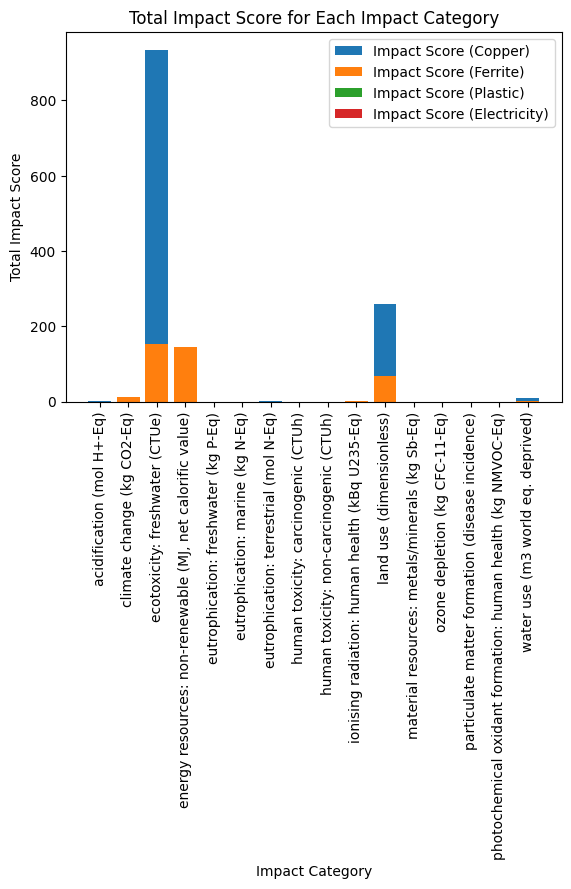

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Combine "Impact category" and "Unit" columns to create x-axis labels
result_df['XLabels'] = result_df['Impact category'] + ' (' + result_df['Unit'] + ')'
categories = result_df['XLabels'].unique()

# Create a stacked bar plot
fig, ax = plt.subplots()

# Get the columns corresponding to the impact of each component
columns = [col for col in result_df.columns if 'Impact Score' in col and 'Total' not in col]

# Plot the stacked bars
for col in columns:
    values = result_df.groupby('XLabels')[col].sum()
    ax.bar(categories, values, label=col)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Add labels and legend
ax.set_xlabel("Impact Category")
ax.set_ylabel("Total Impact Score")
ax.set_title("Total Impact Score for Each Impact Category")
ax.legend()

# Show the plot
plt.show()

**Question:** What is wrong with this plot?

:::{dropdown} Answer
:closed:
Environmental impact scores in LCA are displayed in physical units representing the potential for environmental impact. The results of different impact categories cannot be compared or combined as such. If we want to compare the results from different impact categories, we first have to *normalize* the impacts. One method of normalization is dividing your scores by the scores of a reference situation (e.g., total CO2 emissions from transportation in a particular country). This enables to get a standard scale to compare the impacts.

In what follows, we use the normalization factors provided by the [Environmental Footprint method](https://publications.jrc.ec.europa.eu/repository/bitstream/JRC109878/kjna28984enn_global_norm_factors.pdf), which express the average impacts of one european citizen in the year 2010. For example, the normalization factor for the "climate change" category is equal to 8100 kgCO2-eq.
:::

In [5]:
# Read the normalization factors from the excel file
normalization_factors_df = pd.read_excel('assets/data/normalisation_weighting_factors.xlsx', sheet_name='NF SETS')

# Create a copy of the results dataframe and add the normalization factors for each impact category
result_df_normalized = pd.merge(result_df, normalization_factors_df, how='left', on='Impact category')

# Divide each "Impact Score" column by the corresponding normalization factor
for col in [col for col in result_df.columns if 'Impact Score' in col]:
    result_df_normalized[col] /= result_df_normalized['Normalization factor']

Let's visualize the normalized results. It is better, right?

**Exercise:** Analyse the results. What impact categories are the most significant ? Which components contribute the most ? What would you expect if we had to re-size the inductor in order to minimize the impacts ?

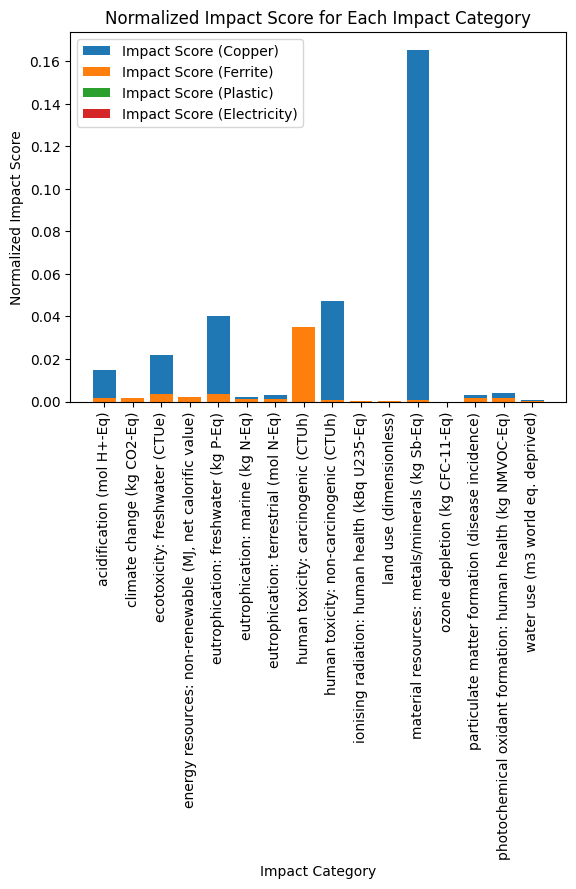

In [6]:
# Create a stacked bar plot
fig, ax = plt.subplots()

# Get the columns for stacking
columns = [col for col in result_df.columns if 'Impact Score' in col and 'Total' not in col]

# Plot the stacked bars
for col in columns:
    values = result_df_normalized.groupby('XLabels')[col].sum()
    ax.bar(categories, values, label=col)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Add labels and legend
ax.set_xlabel("Impact Category")
ax.set_ylabel("Normalized Impact Score")
ax.set_title("Normalized Impact Score for Each Impact Category")
ax.legend()

# Show the plot
plt.show()

# Optimization with various environmental objectives

In [7]:
def calculate_total_impact(sizing_param, impact_category):
    """
    Calculate the LCA score of the inductor for a given impact category.

    Parameters:
    - sizing_param: array, the array that contains the parameters for the sizing
    - impact_category: str, the impact category for which to calculate the total impact score.

    Returns:
    - normalized_score: float, the normalized impact score for the given impact category.
    """

    # Get the sizing code parameters
    M_copper, M_core, M_plastic, E_losses = SizingCode(sizing_param, 'LCA_parameters')

    # Calculate the total impact score for the given impact category
    total_impact_score = (
        M_copper * df_copper[df_copper["Impact category"] == impact_category]["Impact Score"] +
        M_core * df_core[df_core["Impact category"] == impact_category]["Impact Score"] +
        M_plastic * df_body[df_body["Impact category"] == impact_category]["Impact Score"] +
        E_losses * df_electricity[df_electricity["Impact category"] == impact_category]["Impact Score"]
    )
    
    # Normalize the score
    normalization_factor = normalization_factors_df[normalization_factors_df["Impact category"] == impact_category]["Normalization factor"].values[0]
    normalized_score = total_impact_score / normalization_factor

    return normalized_score

In [64]:
# Impact category to minimize
impact_category = "climate change"

# optimization with SLSQP algorithm
constraints = lambda x: SizingCode(x, 'Const')
objective = lambda x: calculate_total_impact(x, impact_category)
result = scipy.optimize.fmin_slsqp(func=objective, 
                                   x0=SizingCodeInductor.parameters, 
                                   bounds=[(.1e-3,10e-3), (0,SizingCodeInductor.B_mag_max)],
                                   f_ieqcons=constraints, 
                                   iter=100, acc=1e-4)

# Final characteristics after optimization 
print("-----------------------------------------------")
print("Final characteristics after optimization :")

SizingCode(result, 'Prt')
print("-----------------------------------------------")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0029522716682886764
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
-----------------------------------------------
Final characteristics after optimization :
* Optimisation variables:
           Airgap e = 5.11 mm
           Induction B = 0.40 T
* Components characteristics:
           Core (2) mass = 6.49 kg
           Coil mass = 1.40 kg
           Core dimensions = 188 x 223 x 103 mmm
           A_iron = 2593 mm^2
           Number of turns = 21
* Constraints (should be >0):
           Winding  surface margin = 5673.064 mm²
           Airgap margin = 0.045 mm
-----------------------------------------------


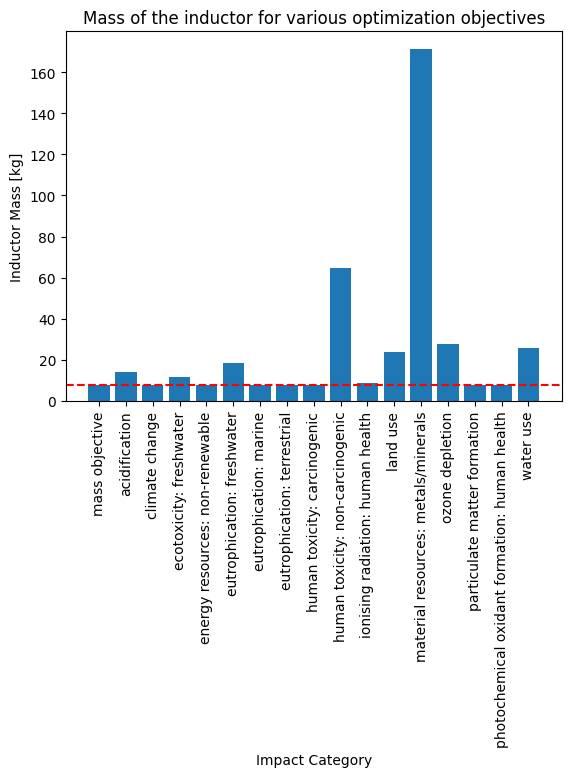

In [63]:
# Record the mass of the inductor obtained with each optimization objective
optimization_dict = {}
optimization_dict["mass objective"] = 7.85  # [kg]
optimization_dict["acidification"] = 13.91  # [kg]
optimization_dict["climate change"] = 7.89  # [kg]
optimization_dict["ecotoxicity: freshwater"] = 11.58  # [kg]
optimization_dict["energy resources: non-renewable"] = 7.88  # [kg]
optimization_dict["eutrophication: freshwater"] = 18.49  # [kg]
optimization_dict["eutrophication: marine"] = 7.94  # [kg]
optimization_dict["eutrophication: terrestrial"] = 7.94  # [kg]
optimization_dict["human toxicity: carcinogenic"] = 7.85  # [kg]
optimization_dict["human toxicity: non-carcinogenic"] = 64.64  # [kg]
optimization_dict["ionising radiation: human health"] = 8.69 # [kg]
optimization_dict["land use"] = 23.8  # [kg]
optimization_dict["material resources: metals/minerals"] = 171.24  # [kg]
optimization_dict["ozone depletion"] = 27.9  # [kg]
optimization_dict["particulate matter formation"] = 7.88  # [kg]
optimization_dict["photochemical oxidant formation: human health"] = 7.89  # [kg]
optimization_dict["water use"] = 25.91  # [kg]

# Plot the mass of the inductor obtained with each optimization objective
plt.bar(list(optimization_dict.keys()), list(optimization_dict.values()))

# Add a horizontal dashed line for the reference value (mass minimization)
plt.axhline(y=optimization_dict["mass objective"], color='r', linestyle='--', label='Reference Value')

# Add labels and title
plt.xlabel('Impact Category')
plt.ylabel('Inductor Mass [kg]')
plt.title('Mass of the inductor for various optimization objectives')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

# Multi-objective optimization

In [37]:
# Read the weighting factors from the excel file
weighting_factors_df = pd.read_excel('assets/data/normalisation_weighting_factors.xlsx', sheet_name='WF SETS')

# Function for calculating the weighted LCA score
def calculate_weighted_impact(sizing_param):
    """
    Calculate the weighted LCA score of the inductor.

    Parameters:
    - sizing_param: array, the array that contains the parameters for the sizing

    Returns:
    - weighted_score: float, the normalized impact score for the given impact category.
    """

    # Get the sizing code parameters
    M_copper, M_core, M_plastic, E_losses = SizingCode(sizing_param, 'LCA_parameters')

    # Calculate the total impact score for the given impact category
    weighted_score = 0
    for impact_category in weighting_factors_df["Impact category"].values:
        weighting_factor = weighting_factors_df[weighting_factors_df["Impact category"] == impact_category]["Weighting factor"].values[0]
        weighted_score += calculate_total_impact(sizing_param, impact_category).values[0] * weighting_factor

    return weighted_score

In [38]:
# optimization with SLSQP algorithm
constraints = lambda x: SizingCode(x, 'Const')
objective = lambda x: calculate_weighted_impact(x)
result = scipy.optimize.fmin_slsqp(func=objective, 
                                   x0=SizingCodeInductor.parameters, 
                                   bounds=[(.1e-3,10e-3), (0,SizingCodeInductor.B_mag_max)],
                                   f_ieqcons=constraints, 
                                   iter=100, acc=1e-4)

# Final characteristics after optimization 
print("-----------------------------------------------")
print("Final characteristics after optimization :")

SizingCode(result, 'Prt')
print("-----------------------------------------------")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.01753621178479853
            Iterations: 10
            Function evaluations: 39
            Gradient evaluations: 10
-----------------------------------------------
Final characteristics after optimization :
* Optimisation variables:
           Airgap e = 2.85 mm
           Induction B = 0.40 T
* Components characteristics:
           Core (2) mass = 15.58 kg
           Coil mass = 1.05 kg
           Core dimensions = 252 x 298 x 138 mmm
           A_iron = 4647 mm^2
           Number of turns = 12
* Constraints (should be >0):
           Winding  surface margin = 12438.898 mm²
           Airgap margin = 4.050 mm
-----------------------------------------------


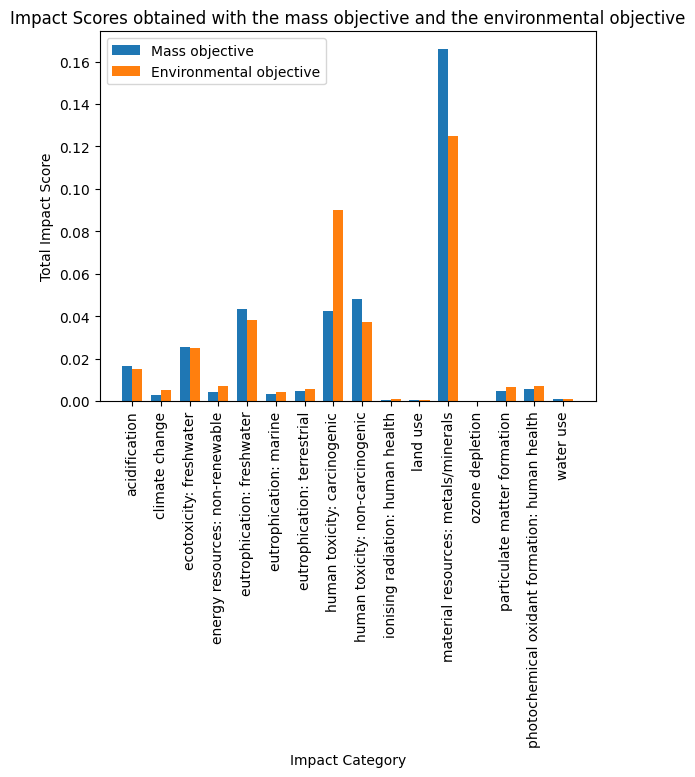

In [76]:
# Compare LCA scores

# List of impact categories
impact_categories = result_df['Impact category'].unique()

# Calculate total impact scores for each optimization objective
sizing_param_mass = [5.14e-3, 0.40]  # [e, B]
impacts_mass_obj = {category: calculate_total_impact(sizing_param_mass, category).values[0] for category in impact_categories}

sizing_param_lca = [2.85e-3, 0.40]  # [e, B]
impacts_lca_obj = {category: calculate_total_impact(sizing_param_lca, category).values[0] for category in impact_categories}

# Bar plot comparing the results
bar_width = 0.35
index = np.arange(len(impact_categories))

fig, ax = plt.subplots()
bar1 = ax.bar(index, impacts_mass_obj.values(), bar_width, label='Mass objective')
bar2 = ax.bar(index + bar_width, impacts_lca_obj.values(), bar_width, label='Environmental objective')

# Add labels, title, and legend
ax.set_xlabel('Impact Category')
ax.set_ylabel('Normalized Impact Score')
ax.set_title('Impact Scores obtained with the mass objective and the environmental objective')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(impact_categories)
ax.legend()
plt.xticks(rotation='vertical')

# Show the plot
plt.show()